<a href="https://colab.research.google.com/github/fbaertl/Applied_Data_science_CAS_2022/blob/main/CAS_M3_Supervised_ML_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#3 Steps : Dataload , model building , analysis of results 

In [3]:
#Import the needed libraries
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn import metrics

from matplotlib import  pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import os
from imageio import imread
import pandas as pd
from time import time as timer

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

Data Load 

In [54]:
#Get CIFAR10 data from our source: https://keras.io/api/datasets/cifar10/
cifar10 = tf.keras.datasets.cifar10

#tf.keras.datasets.cifar10.load_data() ##Optional to take a look at the data

In [55]:
#Giving the classes names
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 
                       'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Load the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [41]:
train_images.shape

(50000, 32, 32, 3)

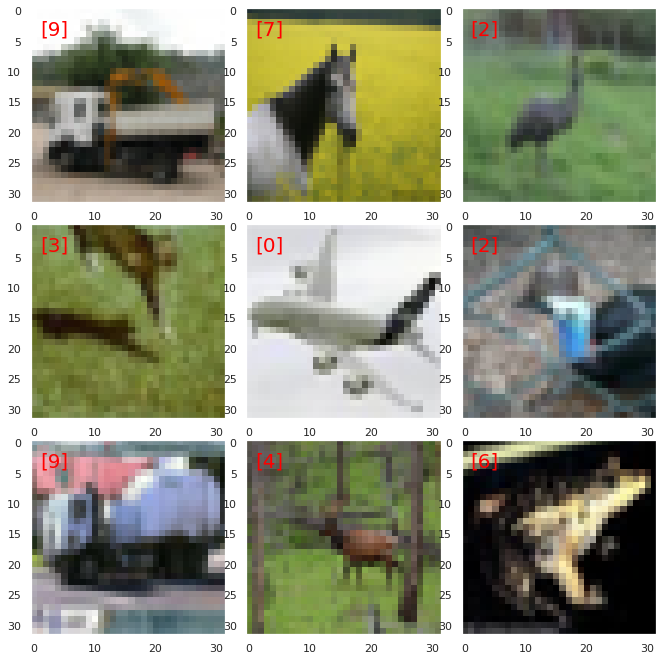

In [57]:
#Taking a look at a few samples

n = 3
fig, ax = plt.subplots(n, n, figsize=(3*n, 3*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='red', size=20)
    ##Optional to indicate the class of the image
  axi.grid(False)
plt.tight_layout(0,0,0)

STL10 dataset is derived from the CIFAR10 dataset but unlabeled data for unsupervised learning. downloaded from: http://cs.stanford.edu/~acoates/stl10/

In [51]:
#only needed when tere is time to to check against the STL10 dateset that is "prepared for unsupervised"

#n_train = len(train_labels)
#x_train = train_images.reshape(50000,32,32,3)
#y_train = train_labels

#n_test = len(test_labels)
#x_test = test_images.reshape(10000,32,32,3)
#y_test = test_labels

#x_train = x_train.transpose(0,2,3,1)
#x_test = x_test.transpose(0,2,3,1)






ValueError: ignored

In [37]:
x_train.shape
x_test.shape


(10000, 32, 32, 3)

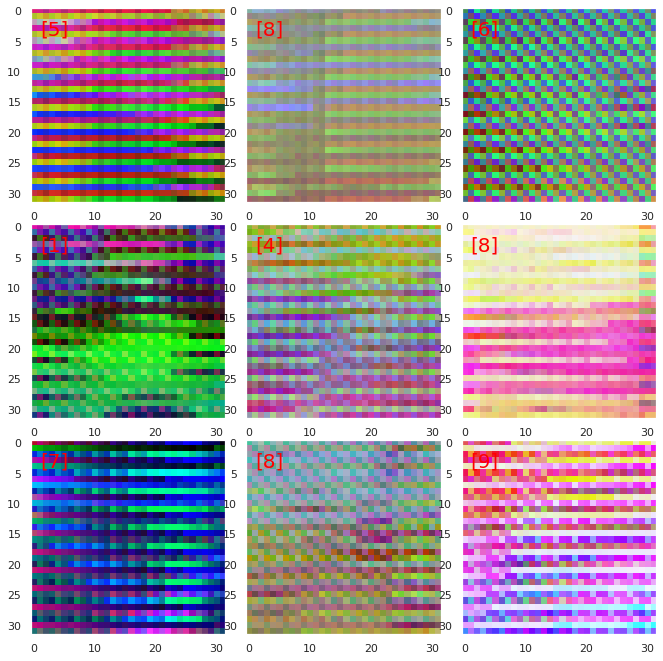

In [56]:
#Taking a look at a few samples

n = 3
fig, ax = plt.subplots(n, n, figsize=(3*n, 3*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = x_train[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='red', size=20)
    ##Optional to indicate the class of the image
  axi.grid(False)
plt.tight_layout(0,0,0)

Model Setup 

In [69]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  #tf.keras.layers.Dense(100, activation='relu'),
  #tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_40 (Dense)            (None, 2000)              6146000   
                                                                 
 dense_41 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_42 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_43 (Dense)            (None, 1000)              1501000   
                                                                 
Total params: 14,650,500
Trainable params: 14,650,500
Non-trainable params: 0
_________________________________________________________________


Model training

Epoch 1/15
200/200 [==============================] - 5s 24ms/step - loss: 2.1097 - accuracy: 0.2576 - val_loss: 1.8905 - val_accuracy: 0.3142
Epoch 2/15
200/200 [==============================] - 5s 24ms/step - loss: 1.9040 - accuracy: 0.3161 - val_loss: 1.8081 - val_accuracy: 0.3484
Epoch 3/15
200/200 [==============================] - 5s 24ms/step - loss: 1.8639 - accuracy: 0.3329 - val_loss: 2.0344 - val_accuracy: 0.3094
Epoch 4/15
200/200 [==============================] - 5s 23ms/step - loss: 1.8313 - accuracy: 0.3483 - val_loss: 1.9511 - val_accuracy: 0.3036
Epoch 5/15
200/200 [==============================] - 5s 24ms/step - loss: 1.8019 - accuracy: 0.3613 - val_loss: 1.7574 - val_accuracy: 0.3714
Epoch 6/15
200/200 [==============================] - 5s 24ms/step - loss: 1.7786 - accuracy: 0.3645 - val_loss: 1.8034 - val_accuracy: 0.3649
Epoch 7/15
200/200 [==============================] - 5s 23ms/step - loss: 1.7784 - accuracy: 0.3677 - val_loss: 1.7723 - val_accuracy: 0.3552

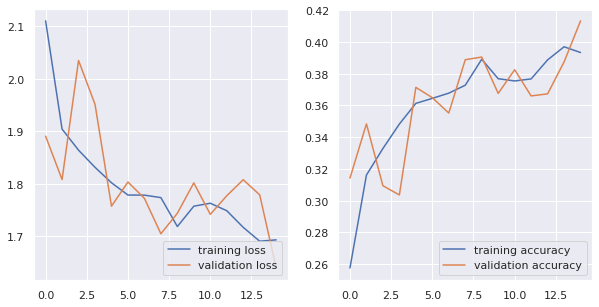

In [76]:
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist = model.fit(x=train_images, y=train_labels,
                 epochs=15, batch_size=250, 
                 validation_data=(test_images,test_labels),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

In [23]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 2.3026 - accuracy: 0.1000 - 3s/epoch - 10ms/step


[2.3026010990142822, 0.10000000149011612]

In [80]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  #tf.keras.layers.Dense(100, activation='relu'),
  #tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(500, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/15
200/200 [==============================] - 14s 70ms/step - loss: 40.3653 - accuracy: 0.2111 - val_loss: 2.2951 - val_accuracy: 0.2774
Epoch 2/15
200/200 [==============================] - 16s 79ms/step - loss: 2.1169 - accuracy: 0.3000 - val_loss: 2.0460 - val_accuracy: 0.3066
Epoch 3/15
200/200 [==============================] - 14s 72ms/step - loss: 1.9015 - accuracy: 0.3437 - val_loss: 1.8989 - val_accuracy: 0.3316
Epoch 4/15
200/200 [==============================] - 14s 72ms/step - loss: 1.8247 - accuracy: 0.3595 - val_loss: 1.8443 - val_accuracy: 0.3519
Epoch 5/15
200/200 [==============================] - 15s 73ms/step - loss: 1.7646 - accuracy: 0.3804 - val_loss: 1.8257 - val_accuracy: 0.3666
Epoch 6/15
200/200 [==============================] - 13s 67ms/step - loss: 1.7342 - accuracy: 0.3907 - val_loss: 1.6966 - val_accuracy: 0.4040
Epoch 7/15
200/200 [==============================] - 13s 67ms/step - loss: 1.6934 - accuracy: 0.4045 - val_loss: 1.7400 - val_accuracy

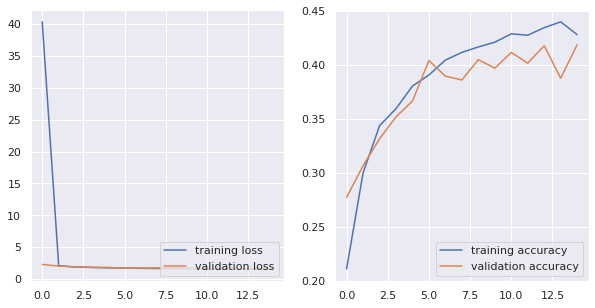

In [81]:
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist2 = model2.fit(x=train_images, y=train_labels,
                 epochs=15, batch_size=250, 
                 validation_data=(test_images,test_labels),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist2.epoch, hist2.history['loss'])
axs[0].plot(hist2.epoch, hist2.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist2.epoch, hist2.history['accuracy'])
axs[1].plot(hist2.epoch, hist2.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

In [82]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/15
200/200 [==============================] - 164s 818ms/step - loss: 1.8313 - accuracy: 0.3338 - val_loss: 1.8049 - val_accuracy: 0.3270
Epoch 2/15
200/200 [==============================] - 158s 789ms/step - loss: 1.6751 - accuracy: 0.3988 - val_loss: 1.6305 - val_accuracy: 0.4130
Epoch 3/15
200/200 [==============================] - 156s 779ms/step - loss: 1.6111 - accuracy: 0.4240 - val_loss: 1.6105 - val_accuracy: 0.4202
Epoch 4/15
200/200 [==============================] - 159s 796ms/step - loss: 1.5517 - accuracy: 0.4432 - val_loss: 1.5943 - val_accuracy: 0.4296
Epoch 5/15
200/200 [==============================] - 157s 783ms/step - loss: 1.5033 - accuracy: 0.4633 - val_loss: 1.5313 - val_accuracy: 0.4538
Epoch 6/15
200/200 [==============================] - 163s 814ms/step - loss: 1.4590 - accuracy: 0.4758 - val_loss: 1.5441 - val_accuracy: 0.4560
Epoch 7/15
200/200 [==============================] - 156s 779ms/step - loss: 1.4328 - accuracy: 0.4850 - val_loss: 1.5173 -

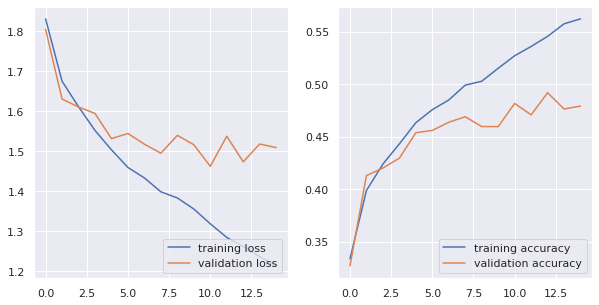

In [84]:
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist3 = model3.fit(x=train_images, y=train_labels,
                 epochs=15, batch_size=250, 
                 validation_data=(test_images,test_labels),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist3.epoch, hist3.history['loss'])
axs[0].plot(hist3.epoch, hist3.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist3.epoch, hist3.history['accuracy'])
axs[1].plot(hist3.epoch, hist3.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

true label:  [8] ; predicted:  0 (airplane)


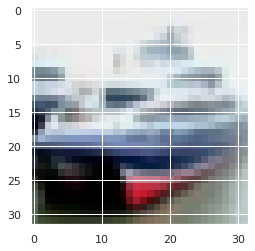

In [75]:
im_id = 1
y_pred = model(test_images)

y_pred_most_probable = np.argmax(y_pred[im_id])
print('true label: ', test_labels[im_id],
      '; predicted: ',  y_pred_most_probable,
      f'({cifar10_class_names[y_pred_most_probable]})')
plt.imshow(test_images[im_id], cmap='gray');

In [89]:
train_labels.shape

(50000, 1)

In [88]:
distribution = train_labels.label.value_counts()
for category, size in zip(distribution.index, distribution.values):
    print(f"{category} {size} images")

AttributeError: ignored

In [85]:
plt.figure(figsize=(10, 5))
train_labels["label"].value_counts().plot(kind='bar',
                                          title='Distribution of classes'
                                         )

IndexError: ignored

<Figure size 720x360 with 0 Axes>